## Author : Sayali Kudale

#### This Notebook is the implementation of GridSearchCV to find out the optimal number of topics for LDA algorithm

In [1]:
# load the required libraries
import warnings
warnings.filterwarnings("ignore") 

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

In [2]:
# load the dataset
df_questionsAllData = pd.read_csv("Data/SO_ProcessedData.csv", encoding="ISO-8859-1")

In [3]:
vectorizer = TfidfVectorizer(stop_words = "english")

In [4]:
def TfidVectorization(data):
    vec = vectorizer.fit(data)   
    vectorized = vec.transform(data)
    return vec, vectorized
 

In [5]:
vec, qstnData = TfidVectorization(df_questionsAllData["QuestionText"].values.astype('U'))


### GridSearchCV 

In [6]:

search_params = {
  'n_components': [10, 20, 25, 30,35,40],
  'learning_decay': [.5, .7,0.9]
}

model = LatentDirichletAllocation()
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=36)
gridsearch.fit(qstnData)
best_lda_model = gridsearch.best_estimator_
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)
print("Model perplexity: ", best_lda_model.perplexity(qstnData))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 36

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -886343.648146
Model perplexity:  11976.9232134


#### Save the results of grid model into the csv file for reference and Create a dataframe which will be used to plot the graph

In [7]:
df_cv_results = pd.DataFrame(gridsearch.cv_results_)
df_cv_results.to_csv("LDAGridSearchResults.csv", header=True, index=False, encoding='utf-8')

#### Plot the cv_results_ to visualise it in the graph

In [8]:
import seaborn as sns
sns.pointplot(x="param_n_components", y="mean_test_score", hue="param_learning_decay", data=df_cv_results)

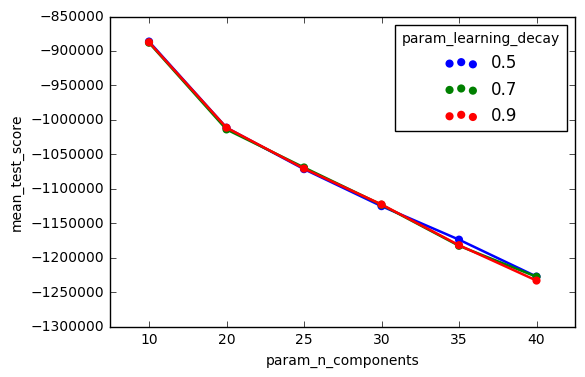

In [9]:
import matplotlib.pyplot as plt
plt.show()